In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Multilayer perceptron

Set a seed for reproducibility:

In [24]:
SEED = 42

In [25]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(SEED)

## Hidden layer

For a sample $\mathbf{x}$ with $d+1$ dimensions (bias included), and a $(d+1)\times h$ weight matrix $\mathbf{W}_1$, the first hidden layer $\mathbf{h}_1$ is computed as

$$
\mathbf{h}_1 = \phi(\mathbf{W}^T_1 \mathbf{x}),
$$

where $\phi$ is the activation function and $\mathbf{h}_1$ is a column vector with $h$ hidden units. If the model has only one hidden layer, the output layer (scores) for $k$ classes is computed as

$$
\mathbf{z} = \mathbf{W}^T_2 \mathbf{h}_1.
$$

Thus, $\mathbf{W}_2$ is a $(h+1) \times k$ weight matrix. The predicted class probabilities $\mathbf{\hat{y}}$ are computed as

$$
\mathbf{\hat{y}} = \operatorname{softmax}(\mathbf{z}).
$$

In [26]:
W1 = np.random.randn(5, 3) # 4 features + 1 bias, 3 hidden units
W2 = np.random.randn(4, 2) # 3 hidden units + 1 bias, 2 classes
x = np.random.randn(5, 1) # 4 features + 1 bias
x[-1] = 1 # bias

sigmoid = lambda x: 1 / (1 + np.exp(-x))
# relu = lambda x: np.maximum(0, x) # uncomment this line to use ReLU instead of sigmoid
# tanh = lambda x: np.tanh(x) # uncomment this line to use tanh instead of sigmoid
softmax = lambda z: np.exp(z) / np.sum(np.exp(z))

h = sigmoid(np.dot(W1.T, x)) # 5 hidden units
h = np.vstack([h, [1]]) # bias
z = np.dot(W2.T, h) # 3 classes
y = softmax(z)

print(f"x:\n {x}\n")
print(f"h:\n {h}\n")
print(f"z:\n {z}\n")
print(f"y:\n {y}")

x:
 [[-1.42474819]
 [-0.54438272]
 [ 0.11092259]
 [-1.15099358]
 [ 1.        ]]

h:
 [[0.14878604]
 [0.27482016]
 [0.11544667]
 [1.        ]]

z:
 [[-0.38612109]
 [-0.16350599]]

y:
 [[0.44457493]
 [0.55542507]]


## XOR problem

The XOR problem is a two-class classification problem where the classes are not linearly separable. The XOR function is defined as

$$
\begin{array}{cc|c}
x_1 & x_2 & y \\
\hline
0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0 \\
\end{array}

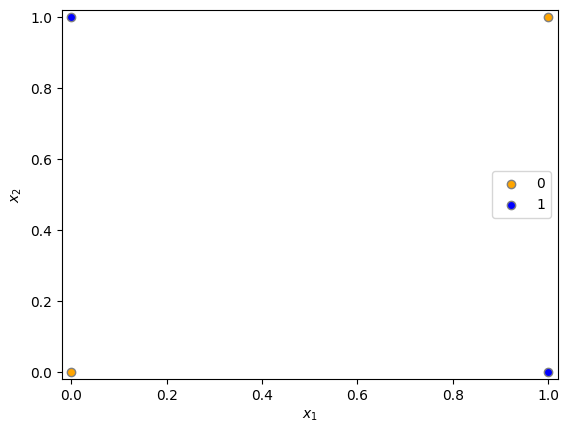

In [27]:
# plot the XOR function
from utils import plot_xor

fig, ax = plt.subplots()
plot_xor(ax=ax)
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
plt.show()

In [28]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1, 1, 0]]).T
print(f"X:\n {X}\n")
print(f"y:\n {y}")

X:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]

y:
 [[0]
 [1]
 [1]
 [0]]


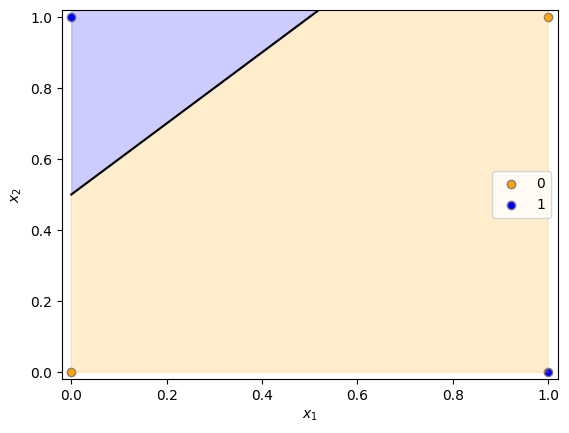

In [29]:
from utils import plot_decision_boundary_2D

fig, ax = plt.subplots()

w = np.array([-1, 1, -0.5])
plot_xor(ax=ax)
plot_decision_boundary_2D(X, w, ax=ax)
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
plt.show()

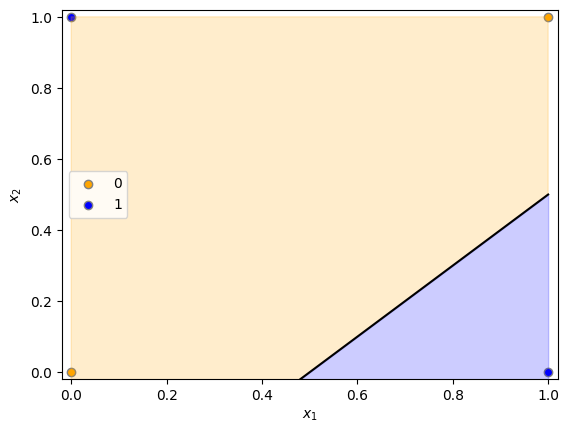

In [30]:
fig, ax = plt.subplots()

w = np.array([1, -1, -0.5])
plot_xor(ax=ax)
plot_decision_boundary_2D(X, w, ax=ax)
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
plt.show()

In [31]:
from utils import plot_classification_dataset_2D

sign = lambda x: (x > 0).astype(int)

W1 = np.array([[-1, 1, -0.5], [1, -1, -0.5]]).T  # 2 + 1 features, 2 hidden units
X_b = np.hstack([X, np.ones((X.shape[0], 1))]) # add bias
h = sign(np.dot(X_b, W1)) # 2 hidden units (projection)

print(f"W:\n {W1}\n")
print(f"X_b:\n {X_b}\n")
print(f"h:\n {h}")

W:
 [[-1.   1. ]
 [ 1.  -1. ]
 [-0.5 -0.5]]

X_b:
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]

h:
 [[0 0]
 [1 0]
 [0 1]
 [0 0]]


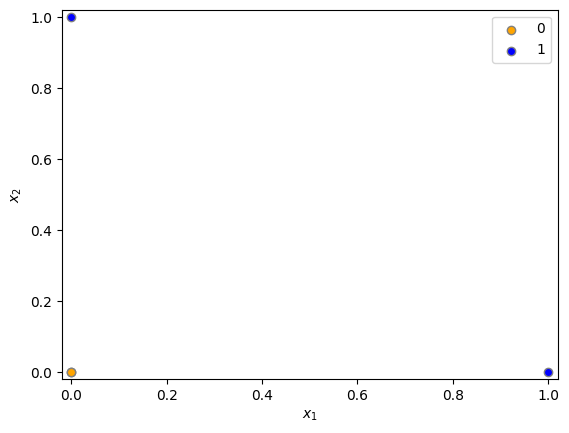

In [32]:
fig, ax = plt.subplots()

y = np.array([0, 1, 1, 0])
plot_classification_dataset_2D(h, y, negative_label=0, ax=ax, labels=['0', '1'])
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
plt.show()

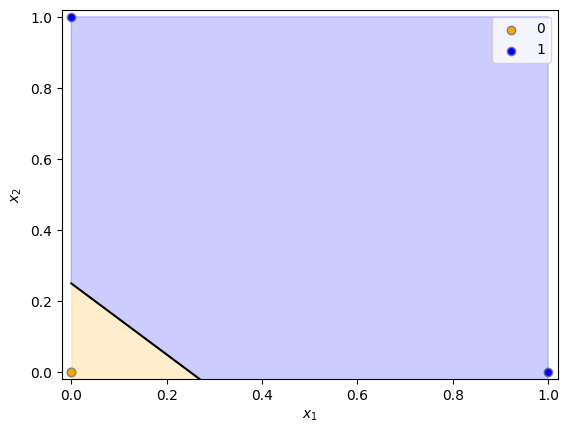

In [33]:
fig, ax = plt.subplots()

w = np.array([1, 1, -0.25])

plot_classification_dataset_2D(h, y, negative_label=0, ax=ax, labels=["0", "1"])
plot_decision_boundary_2D(h, w, ax=ax)
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
plt.show()

In [34]:
W2 = np.array([[1, 1, -0.25]]).T

h_b = np.hstack([h, np.ones((h.shape[0], 1))]) # add bias
z = np.dot(h_b, W2)
y = sign(z)


print(f"w:\n {w}\n")
print(f"h_b:\n {h_b}\n")
print(f"z:\n {z}\n")
print(f"y:\n {y}")

w:
 [ 1.    1.   -0.25]

h_b:
 [[0. 0. 1.]
 [1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]

z:
 [[-0.25]
 [ 0.75]
 [ 0.75]
 [-0.25]]

y:
 [[0]
 [1]
 [1]
 [0]]


## Training using backpropagation

Train set size: 80
Test set size: 20
ymin: 0, ymax: 2


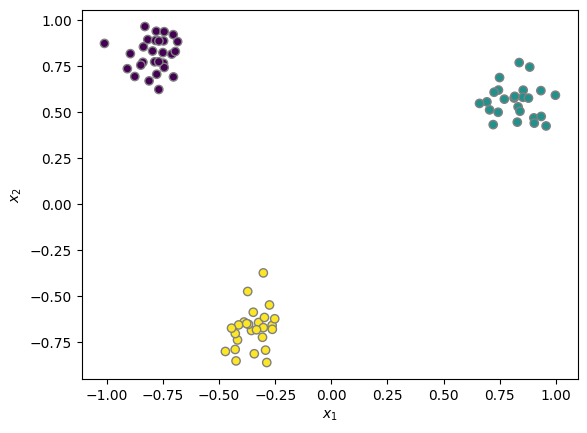

In [35]:
from utils import make_classification_dataset
from sklearn.model_selection import train_test_split

num_classes = 3  # number
X, y = make_classification_dataset(100, 2, num_classes, cluster_std=1)

# Normalize X
X = X / X.max()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Plot the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="gray")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

print(f"ymin: {y.min()}, ymax: {y.max()}")

In [36]:
def cross_entropy_loss(y_pred, class_idx):
    """ Compute the cross-entropy loss for a single exemplar.
    
    Args:
        y_pred: the predicted class probabilities.
        class_idx: the index of the true class.
    """
    loss = -np.log(y_pred[class_idx, 0])
    return loss

def cross_entropy_grad(y_pred, class_idx):
    """ Compute the gradient of the cross-entropy loss wrt the predicted class probabilities.

    Args:
        y_pred: the predicted class probabilities.
        class_idx: the index of the true class.
    """
    grad = -1 / y_pred[class_idx, 0]
    grad_output = np.zeros_like(y_pred)
    grad_output[class_idx] = grad
    return grad_output

def softmax_grad(grad_output, y_pred):
    """ Computer the gradient of the loss wrt the logits of the softmax function. 
    
    Args:
        grad_output: the gradient of the loss wrt the output of the softmax.
        y_pred: the output of the softmax function.
    """

    # Compute the Jacobian matrix of the softmax function
    J = np.dot(-y_pred, y_pred.T)
    J[np.diag_indices_from(J)] = y_pred.flatten() * (1 - y_pred.flatten())
    grad = np.dot(J.T, grad_output)
    return grad


def sigmoid_grad(grad_output, s):
    """ Compute the gradient of the loss wrt the output of the sigmoid function.

    Args:
        grad_output: the gradient of the loss wrt the output of the sigmoid function.
        s: the output of the sigmoid function.
    """
    grad = grad_output * s * (1 - s)
    return grad

def linear_gradW(grad_output, x):
    """ Compute the gradient of the loss wrt the output of a linear layer.

    Args:
        grad_output: the gradient of the loss wrt the output of the linear layer.
        x: the input of the linear layer.
    """
    grad = np.dot(x, grad_output.T)
    return grad

def linear_gradx(grad_output, W):
    """ Compute the gradient of the loss wrt the input of a linear layer.

    Args:
        grad_output: the gradient of the loss wrt the output of the linear layer.
        W: the weights of the linear layer.
    """
    grad = np.dot(W, grad_output)
    return grad

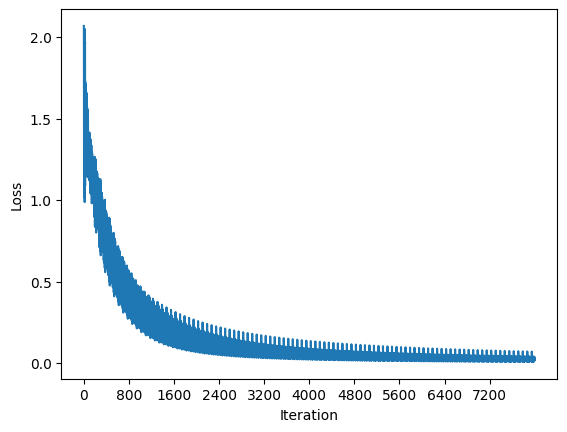

In [37]:
from utils import plot_loss_history


# Softmax function
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

np.random.seed(SEED)

num_epochs = 100
learning_rate = 1e-02

# Add a bias term
X_b = np.hstack([X_train, np.ones((X_train.shape[0], 1))])

# Random weights initialization
num_hidden_units = 10 # number of hidden units
W1 = np.random.normal(size=(X_b.shape[1], num_hidden_units))  # 2 features + 1 bias, 10 hidden units
W2 = np.random.normal(size=(num_hidden_units + 1, num_classes))  # 10 hidden units + 1 bias, 3 classes
h1 = np.zeros((num_hidden_units + 1, 1))  # 10 hidden units + 1 bias

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for k in range(len(X_b)):
        x = X_b[k].reshape(-1, 1)  # make it a column vector

        # Forward pass (prediction)
        z1 = np.dot(W1.T, x) # 10 hidden units
        h1[:-1] = sigmoid(z1) # 10 hidden units
        z2 = np.dot(W2.T, h1)  # 3 classesx
        y_pred = softmax(z2) # 3 classes

        # Loss
        loss_value = cross_entropy_loss(y_pred, y_train[k])
        loss_history.append(loss_value)

        # Backward pass (gradient computation)
        grad_loss = cross_entropy_grad(y_pred, y_train[k])
        grad_z2 = softmax_grad(grad_loss, y_pred)
        grad_W2 = linear_gradW(grad_z2, h1)
        grad_h1 = linear_gradx(grad_z2, W2)
        grad_z1 = sigmoid_grad(grad_h1[:-1], h1[:-1])
        grad_W1 = linear_gradW(grad_z1, x)

        # Update weights
        W1 = W1 - learning_rate * grad_W1
        W2 = W2 - learning_rate * grad_W2

        iteration += 1

plot_loss_history(loss_history, interval=iteration // 10)

### Test

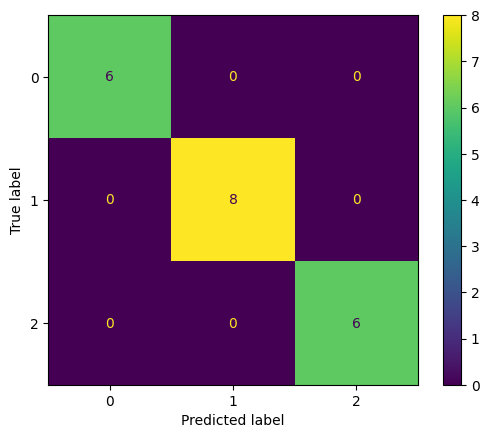


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [38]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

X_b = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

y_pred = []
for k in range(len(X_b)):
    x = X_b[k].reshape(-1, 1)  # make it a column vector
    # Forward pass (prediction)
    z1 = np.dot(W1.T, x) # 10 hidden units
    h1[:-1] = sigmoid(z1) # 10 hidden units
    z2 = np.dot(W2.T, h1) # 3 classes
    y_pred.append(np.argmax(z2))
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)

### A batch gradient descent approach

In [39]:
# Batch implementation

def cross_entropy_loss(Y_pred, class_idxs):
    """Compute the cross-entropy loss for a batch of exemplars.

    Args:
        Y_pred: the predicted class probabilities.
        class_idxs: the indices of the true classes.
    """
    losses = -np.log(Y_pred[range(len(class_idxs)), class_idxs])
    return np.mean(losses)

def cross_entropy_grad(Y_pred, class_idxs):
    """Compute the gradient of the cross-entropy loss wrt the predicted class probabilities (batch version).

    Args:
        Y_pred: the predicted class probabilities.
        class_idxs: the indices of the true classes.
    """
    grad = -1 / Y_pred[range(len(Y_pred)), class_idxs] # n,
    grad_output = np.zeros_like(Y_pred) # (n, k)
    grad_output[range(len(grad_output)), class_idxs] = grad # (n, k)
    return grad_output # (n, k)


def softmax_grad(grad_output, Y_pred):
    """Computer the gradient of the loss wrt the logits of the softmax function (batch version).

    Args:
        grad_output: the gradient of the loss wrt the output of the softmax.
        Y_pred: the output of the softmax function.
    """
    grad = np.zeros_like(grad_output) # (n, k)
    for i in range(len(grad_output)):
        y_pred = Y_pred[i].reshape(-1, 1) # (k, 1)
        J = np.dot(-y_pred, y_pred.T) # (k, 1) * (1, k) => (k, k)
        J[np.diag_indices_from(J)] = y_pred.flatten() * (1 - y_pred.flatten()) # (k, k)
        grad[i] = np.dot(grad_output[i], J) # (k,) @ (k, k) => (k,)
    return grad


def sigmoid_grad(grad_output, s):
    """Compute the gradient of the loss wrt the output of the sigmoid function (batch version).

    Args:
        grad_output: the gradient of the loss wrt the output of the sigmoid function.
        s: the output of the sigmoid function.
    """
    grad = grad_output * s * (1 - s) # (n, h) * (n, h) => (n, h)
    return grad

def linear_gradW(grad_output, X):
    """Compute the gradient of the loss wrt the output of a linear layer (batch version).

    Args:
        grad_output: the gradient of the loss wrt the output of the linear layer.
        X: the input of the linear layer.
    """
    grad = np.dot(X.T, grad_output) # (d, n) @ (n, h) => (d, h)
    
    # average over the batch
    grad /= X.shape[0]
    return grad

def linear_gradX(grad_output, W):
    """Compute the gradient of the loss wrt the input of a linear layer (batch version).

    Args:
        grad_output: the gradient of the loss wrt the output of the linear layer.
        W: the weights of the linear layer.
    """
    grad = np.dot(grad_output, W.T) # (n, h) @ (h, d) => (n, d)
    return grad

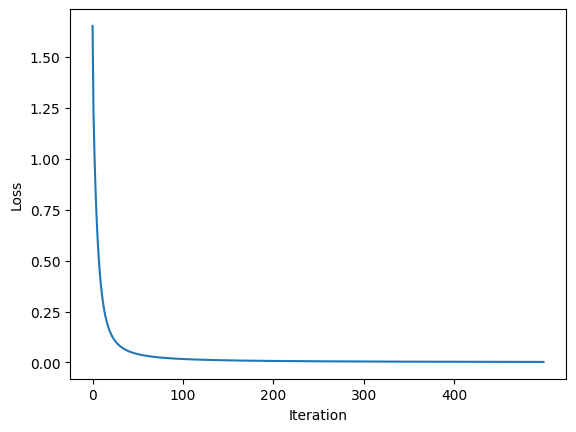

In [40]:
np.random.seed(SEED)

# Adjust softmax to work with multiple samples
softmax = lambda z: np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

# Adjust the number of epochs and the learning rate
num_epochs = 500
learning_rate = 1

# Add a bias term
X_b = np.hstack([X_train, np.ones((X_train.shape[0], 1))])

# Number of samples
num_samples = X_b.shape[0]

# Random weights initialization
num_hidden_units = 10  # number of hidden units
W1 = np.random.normal(size=(X_b.shape[1], num_hidden_units))  # 2 features + 1 bias, 10 hidden units
W2 = np.random.normal(size=(num_hidden_units + 1, num_classes))  # 10 hidden units + 1 bias, 3 classes
h1 = np.zeros((num_samples, num_hidden_units + 1))  # 10 hidden units + 1 bias

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    # Forward pass (prediction)
    z1 = np.dot(X_b, W1)  # N x 10
    h1[:, :-1] = sigmoid(z1)  # N x 10
    z2 = np.dot(h1, W2)  # N x 3
    Y_pred = softmax(z2)  # N x 3

    # Loss
    loss_value = cross_entropy_loss(Y_pred, y_train)
    loss_history.append(loss_value)

    # Backward pass (gradient computation)
    grad_loss = cross_entropy_grad(Y_pred, y_train)
    grad_z2 = softmax_grad(grad_loss, Y_pred)
    grad_W2 = linear_gradW(grad_z2, h1)
    grad_h1 = linear_gradX(grad_z2, W2)
    grad_z1 = sigmoid_grad(grad_h1[:, :-1], h1[:, :-1])
    grad_W1 = linear_gradW(grad_z1, X_b)

    # Update weights
    W1 = W1 - learning_rate * grad_W1
    W2 = W2 - learning_rate * grad_W2

    iteration += 1
plot_loss_history(loss_history, interval=100)

### Test

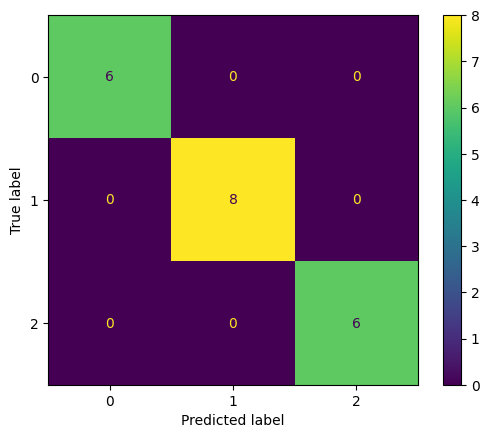


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [42]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

num_samples = X_test.shape[0]
X_b = np.hstack([X_test, np.ones((num_samples, 1))])
h1 = np.zeros((num_samples, num_hidden_units + 1))  # 10 hidden units + 1 bias

# Forward pass (prediction)
z1 = np.dot(X_b, W1)  # N x 10
h1[:, :-1] = sigmoid(z1)  # N x 10
z2 = np.dot(h1, W2)  # N x 3
y_pred = np.argmax(z2, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)